In [12]:
import cv2
import numpy as np
import pandas as pd
import torch
import os
import time
import matplotlib.pyplot as plt
import math
import torch.nn.functional as F
import torchvision.transforms as tf
import torchvision.models as models
from torch.utils.data import Dataset, DataLoader
from torchvision.utils import make_grid
from PIL import Image
from collections import OrderedDict

torch.cuda.empty_cache()


In [13]:
modelA = torch.load('modelA.pth',map_location=torch.device('cpu'))
modelB = torch.load('modelB.pth',map_location=torch.device('cpu'))

In [14]:
print(modelA)
print(modelB)

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Linear(in_features=9216, out_features=1024, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.4, 

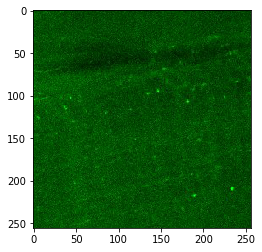

In [15]:
path = 'DATA/Images/destinations/'
img1 = Image.open('DATA/Images/destination/Garth_A01_G006_0007[0,1].jpg')
plt.imshow(img1)

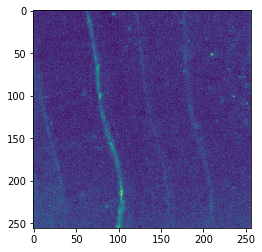

In [16]:
path = 'DATA/Images/destinations/'
img2 = Image.open('DATA/Images/destination/Garth_A01_G006_0220[4,1].jpg')
plt.imshow(img2)
test = np.array(cv2.imread('DATA/Images/destination/Garth_A01_G006_0220[0,1].jpg'))
plt.imshow(test[:,:,1])

In [17]:
trans = tf.Compose([tf.Resize((256,256), interpolation=2),
                  tf.ToTensor(),
                  tf.Normalize([0.485, 0.456, 0.406],[0.229, 0.224, 0.225])
                   ])

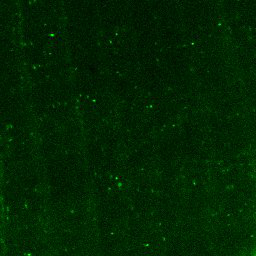

In [18]:
img2

In [19]:
modelA(trans(img2).view(1,3,256,256)).argmax(dim=1)

tensor([2])

In [20]:
modelB(trans(img2).view(1,3,256,256))

tensor([[6.6954]], grad_fn=<AddmmBackward>)